In [1]:
import numpy as np
from tensorflow import keras
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras import losses 
from keras import metrics
from keras import optimizers
from keras import models

In [2]:
(train_img, train_label), (test_img, test_label) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
print(train_img.shape)
print(test_img.shape)

(60000, 28, 28)
(10000, 28, 28)


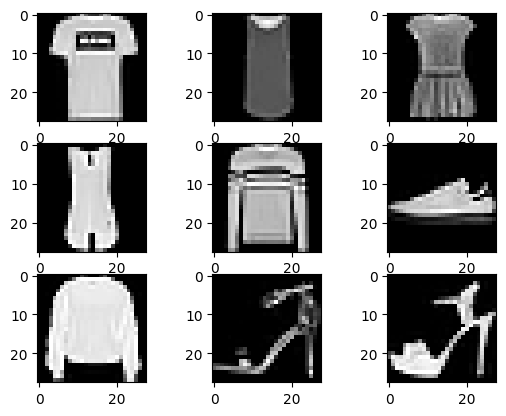

In [4]:
for i in range(1, 10):
  plt.subplot(3, 3, i)
  plt.imshow(train_img[i], cmap= plt.get_cmap('gray'))
plt.show()

In [5]:
train_img=train_img.astype('float32')
test_img=test_img.astype('float32')
train_img=train_img / 255.0
test_img=test_img / 255.0

In [6]:
train_img = np.expand_dims(train_img, -1)
test_img = np.expand_dims(test_img, -1)
print(train_img.shape)

(60000, 28, 28, 1)


In [7]:
from keras.utils.sidecar_evaluator import optimizer
def conv_model():
  models=Sequential()
  models.add(Conv2D(64,(5,5), 
                    padding='same',
                    activation='relu',
                    input_shape=(28,28,1)))
  models.add(MaxPooling2D(pool_size=(2,2)))
  models.add(Conv2D(128, (5,5),
                    padding='same',
                    activation='relu'))
  models.add(MaxPooling2D(pool_size=(2,2)))
  models.add(Conv2D(256, (5,5),
                    padding='same',
                    activation='relu'))
  models.add(MaxPooling2D(pool_size=(2,2)))
  models.add(Flatten())
  models.add(Dense(256, activation='relu'))
  models.add(Dense(10, activation='softmax'))
  return models

model = conv_model()

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',

              metrics = ['accuracy'])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        1664      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 128)       204928    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 128)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 256)         819456    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 3, 3, 256)        0

In [10]:
history = model.fit(
    train_img,
    train_label,
    epochs=10,
    batch_size=200, 
    #validation_data=(valid_img, valid_label)
    validation_split=0.33
)

Epoch 1/10
201/201 [==============================] - 633s 3s/step - loss: 0.5674 - accuracy: 0.7918 - val_loss: 0.3556 - val_accuracy: 0.8725
Epoch 2/10
201/201 [==============================] - 602s 3s/step - loss: 0.3171 - accuracy: 0.8837 - val_loss: 0.3205 - val_accuracy: 0.8817
Epoch 3/10
201/201 [==============================] - 604s 3s/step - loss: 0.2623 - accuracy: 0.9047 - val_loss: 0.2630 - val_accuracy: 0.9050
Epoch 4/10
201/201 [==============================] - 617s 3s/step - loss: 0.2284 - accuracy: 0.9162 - val_loss: 0.2474 - val_accuracy: 0.9122
Epoch 5/10
201/201 [==============================] - 598s 3s/step - loss: 0.1998 - accuracy: 0.9264 - val_loss: 0.2410 - val_accuracy: 0.9118
Epoch 6/10
201/201 [==============================] - 601s 3s/step - loss: 0.1713 - accuracy: 0.9369 - val_loss: 0.2416 - val_accuracy: 0.9119
Epoch 7/10
201/201 [==============================] - 580s 3s/step - loss: 0.1496 - accuracy: 0.9434 - val_loss: 0.2302 - val_accuracy: 0.9203

In [11]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


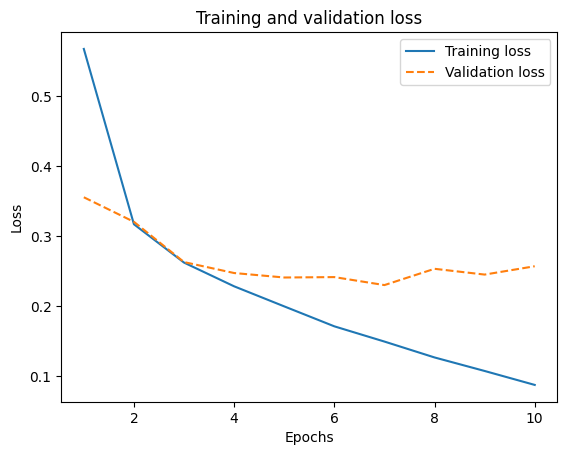

Text(0.5, 1.0, 'Training and validation accurancy')

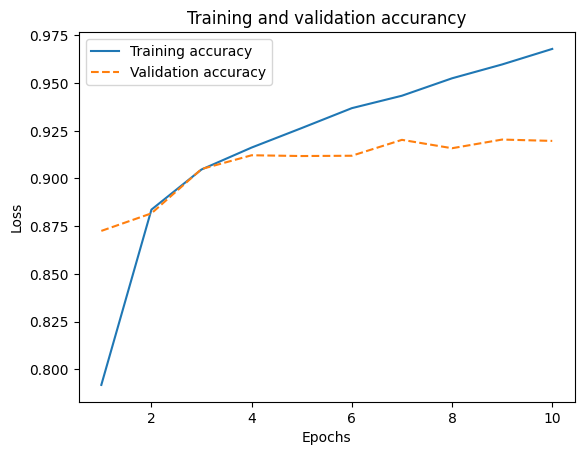

In [12]:
hist_dict = history.history
values_loss= hist_dict["loss"]
values_loss_valid = hist_dict['val_loss']
epochs=range(1, len(hist_dict['accuracy']) +1)

plt.plot(epochs, values_loss, '-', label='Training loss')
plt.plot(epochs, values_loss_valid, '--', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and validation loss')
plt.show()

plt.clf()
values_accuracy_valid = hist_dict['val_accuracy']
plt.plot(epochs, hist_dict['accuracy'], '-', label='Training accuracy')
plt.plot(epochs, hist_dict['val_accuracy'], '--', label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title("Training and validation accurancy")

In [13]:
results=model.evaluate(test_img, test_label)
print(results)

313/313 [==============================] - 36s 115ms/step - loss: 0.2872 - accuracy: 0.9102
[0.28716742992401123, 0.9101999998092651]


In [21]:
model.save_weights('./model.h5', overwrite=True)

# Висновок

В результаті створення на навчання нейромоережі було доясягено результату точності - 91%. Та втрати скалають 28%. 
Даний результат є вищим, ніж при подібній мережі повнозв'язного типу і досягається цей результат мешою кількістю епох. Що є трохи зручнішим, проте нейрона мережа згорткового типу навчається набагато довше, аніж мережа повнозв'язного типу.

1/1 [==============================] - 0s 51ms/step
ankle_boots


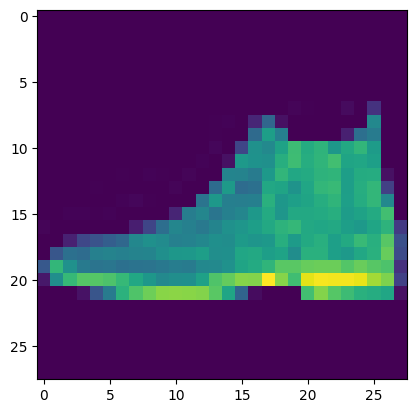

In [20]:
labels = ['t_shirt', 'trouser', 'pullover', 'dress', 'coat','sandal', 'shirt', 'sneaker', 'bag', 'ankle_boots']
                      
prediction=model.predict(test_img[:1])
label=labels[np.argmax(prediction)]

print(label)
plt.imshow(test_img[:2][0])
plt.show()